# testGCFBv211
- Compare output signals of GammachrPy (Python) to the original Gammachirp filterbank (Matlab)
- The output signals of the Gammachirp filterbank are saved as a mat-file (.mat).

In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import scipy.io as sio
import GCFBv211 as gcfb_main

## Set default paramteres for the Gammachirp filterbank (GCFB)

In [24]:
class GCparamDefault:
    fs = 48000
    NumCh = 100
    FRange = np.array([100, 6000])
    OutMidCrct = "No"

## Make a simple pulse train as an input signal 

In [25]:
# Stiumli : a simple pulse train
fs = 48000
t_pulse = 10 # (ms) 100 Hz pulse train
snd = np.array(([1]+[0]*int(t_pulse*fs/1000-1))*10)
t_snd = len(snd)/fs
print(f"Duration of sound = {t_snd*1000} (ms)")

Duration of sound = 100.0 (ms)


Text(0.5, 1.0, 'Input: pulse train')

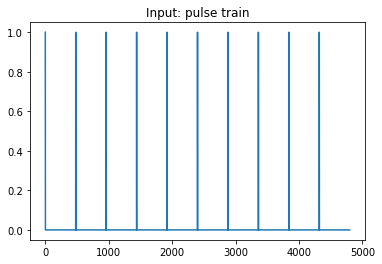

In [26]:
# Plot the input signal
fig, ax = plt.subplots()
ax.plot(snd)
ax.set_title("Input: pulse train")

## Input level: 40 dB SPL

In [27]:
spl_snd_eq = 40
GCparam_ctrl = 'dynamic'

In [28]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, spl_snd_eq)

# GCFB
GCparam = GCparamDefault() # reset all
GCparam.Ctrl = GCparam_ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_main.GCFBv211(snd_eq, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 0.6 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 1.3 (sec)
Dynamic Compressive-Gammachirp: Tim

In [29]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{GCparam.Ctrl}_{spl_snd_eq}dBSPL.mat"
name_file
GCout_org = sio.loadmat(name_file)

In [30]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'RMSE: {rmse}')

RMSE: 4.1141334993690446e-14


In [31]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'RMSE: {rmse}')

RMSE: 1.0984229101280746e-14


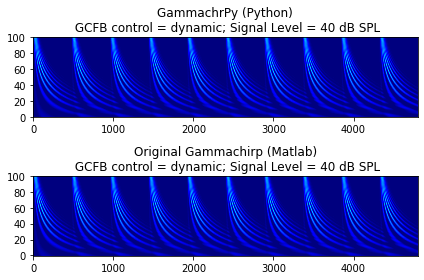

In [32]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachrPy (Python)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

## Input level: 60 dB SPL

In [33]:
spl_snd_eq = 60
GCparam_Ctrl = 'dynamic'

In [34]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, spl_snd_eq)

# GCFB
GCparam = GCparamDefault() # reset all
GCparam.Ctrl = GCparam_Ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_main.GCFBv211(snd_eq, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.3 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 0.7 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 1.4 (sec)
Dynamic Compressive-Gammachirp: Tim

In [35]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{GCparam.Ctrl}_{spl_snd_eq}dBSPL.mat"
name_file
GCout_org = sio.loadmat(name_file)

In [36]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'RMSE: {rmse}')

RMSE: 2.2682677583240407e-13


In [37]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'RMSE: {rmse}')

RMSE: 1.09844849984463e-13


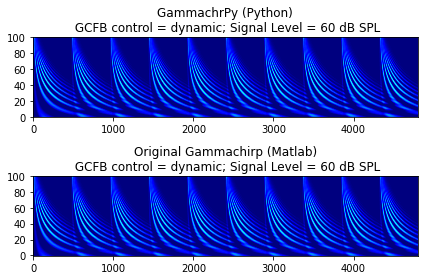

In [38]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachrPy (Python)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

## Input level: 80 dB SPL

In [39]:
spl_snd_eq = 80
GCparam_Ctrl = 'dynamic'

In [40]:
# Level equalization
snd_eq, _ = utils.Eqlz2MeddisHCLevel(snd, spl_snd_eq)

# GCFB
GCparam = GCparamDefault() # reset all
GCparam.Ctrl = GCparam_Ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_main.GCFBv211(snd_eq, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 0.9 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 1.7 (sec)
Dynamic Compressive-Gammachirp: Tim

In [41]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{GCparam.Ctrl}_{spl_snd_eq}dBSPL.mat"
name_file
GCout_org = sio.loadmat(name_file)

In [42]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'RMSE: {rmse}')

RMSE: 1.7455400415295252e-12


In [43]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'RMSE: {rmse}')

RMSE: 1.0987470937777825e-12


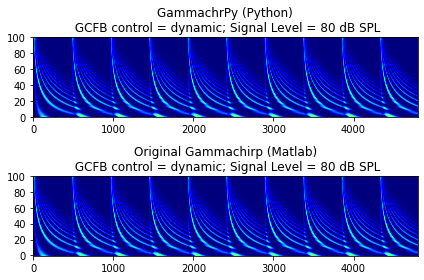

In [44]:
# GammachirPy (Python)
ax = plt.subplot(2, 1, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GammachrPy (Python)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original Gammachirp (Matlab)
ax = plt.subplot(2, 1, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Matlab)\n GCFB control = {GCparam.Ctrl}; Signal Level = {spl_snd_eq} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()